# Spectral properties of random graphs

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.sparse.linalg import eigsh
import sys

sys.path.append('../')
from src.utils import *

np.set_printoptions(legacy='1.25')

fig_directory = '../../Note/Notes/Figures/05_percolation/'

Here we investigate some of the spectral properties of random graphs and compare it with th theoretical results seen during the lectures.

## Erdos-Renyi

In [102]:
n = 5000 # number of nodes
d_avg = 100 # expected average degree

# generate the graph
g = nx.erdos_renyi_graph(n, d_avg/n)

# compute the adjacency matrix
A = nx.adjacency_matrix(g) 

# compute the eigenvalues of the adjacency matrix
s = np.linalg.eigvalsh(A.todense())

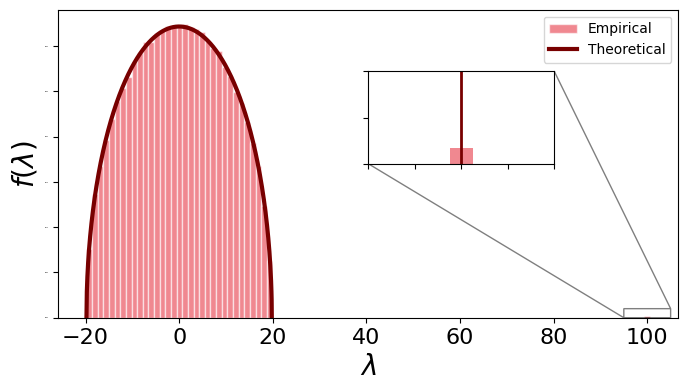

In [114]:
fig, ax = plt.subplots(1,1, figsize = (8,4))

ax.hist(s, bins = 100, density = True, edgecolor = 'white', alpha = 0.6, color = '#e63946', label = 'Empirical')

# inset Axes....
x1, x2, y1, y2 = d_avg-5, d_avg+5, 0, 0.001  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.3, 0.3],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

axins.hist(s, bins = 100, density = True, alpha = 0.6, color = '#e63946')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.axvline(d_avg, color = '#780000', linewidth = 2)

p = d_avg/n
c_ = n*p*(1-p)
x = np.linspace(-2*np.sqrt(c_), 2*np.sqrt(c_), 1000)
ax.plot(x, np.sqrt(4*c_ - x**2)/(2*np.pi*np.sqrt(c_**2)), color = '#780000', linewidth = 3, label = 'Theoretical')

plt.legend(loc = 0)

ax.set_xlabel(r'$\lambda$', fontsize = 20)
ax.set_ylabel(r'$f(\lambda)$', fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize = 16)
ax.tick_params(axis='y', which='major', labelsize = 0)

plt.savefig(f'{fig_directory}wigner.pdf', bbox_inches = 'tight', dpi = 400)
plt.show();

## Watts-Strogatz

In [169]:
n = 5000 # number of nodes
d_avg = 100 # expected average degree

p_rev = np.linspace(0,1,10)
s = []

for p in p_rev:

    # generate the graph
    g = nx.watts_strogatz_graph(n, d_avg, p)

    # compute the adjacency matrix
    A = nx.adjacency_matrix(g) 

    # compute the eigenvalues of the adjacency matrix
    s.append(SpectralRadius(A))

n = 2000
g = nx.watts_strogatz_graph(n, d_avg, 0.3)
A = nx.adjacency_matrix(g)
lam = np.linalg.eigvalsh(A.todense())

In [170]:
def WS_def_distr(d, k, p):
    S = 0
    for m in range(np.min([k, d-k])+1):
        S += binom.pmf(m, k, 1-p)*binom.pmf(d-k-m, (n-1)*k, p/(n-1))

    return S

# compute the value of phi from the empirical distribution
th_ = [np.sum([d**2*WS_def_distr(d, int(d_avg/2), p) for d in range(500)])/d_avg for p in p_rev]

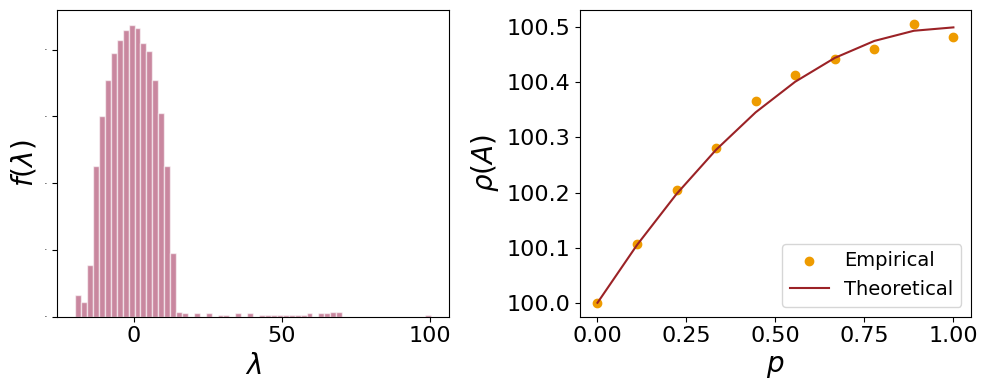

In [175]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].hist(lam, bins = 60, edgecolor = 'white', alpha = 0.6, color = '#a53860', density = True)
ax[1].scatter(p_rev, s, marker = 'o', color = '#ee9b00', label = 'Empirical')
ax[1].plot(p_rev, th_, color = '#9b2226', label = 'Theoretical')
ax[1].legend(fontsize = 14, loc = 4)


ax[1].set_xlabel(r'$p$', fontsize = 20)
ax[1].set_ylabel(r'$\rho(A)$', fontsize = 20)
ax[1].tick_params(axis='x', which='major', labelsize = 16)
ax[1].tick_params(axis='y', which='major', labelsize = 16)

ax[0].set_xlabel(r'$\lambda$', fontsize = 20)
ax[0].set_ylabel(r'$f(\lambda)$', fontsize = 20)
ax[0].tick_params(axis='x', which='major', labelsize = 16)
ax[0].tick_params(axis='y', which='major', labelsize = 0)

plt.tight_layout()
plt.savefig(f'{fig_directory}WS.pdf', bbox_inches = 'tight', dpi = 400)


## Sparse graphs

In [20]:
n = 5000

pv = np.linspace(1.2, 30, 20)
ρv = np.ones(len(pv))
ρvB = np.ones(len(pv))

for i, p in enumerate(pv):
    print(f'{i+1}/{len(pv)}', end  = '\r')
    g = nx.erdos_renyi_graph(n, p/n)
    A = nx.adjacency_matrix(g)

    ρ, _ = eigsh(A, k = 1, which = 'LM')
    ρv[i] = ρ[0]
    ρvB[i] = SpectralRadiusNB(A)


In [17]:
d = 5
n = 2500
g = nx.erdos_renyi_graph(n, d/n)
A = nx.adjacency_matrix(g)

s = np.linalg.eigvals(GetBp(A).toarray())

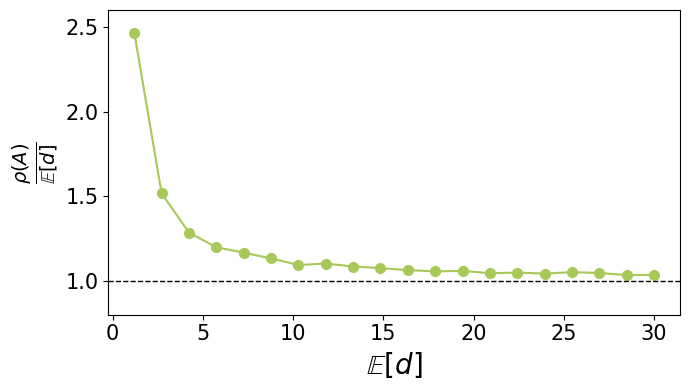

In [18]:
fig, ax = plt.subplots(1,1, figsize =  (7,4))

ax.plot(pv, np.array(ρv)/pv, marker = 'o', markersize = 7, color = '#a7c957')
ax.axhline(1, color = 'k', linewidth = 1, linestyle = '--')

ax.set_xlabel(r'$\mathbb{E}[d]$', fontsize = 20)
ax.set_ylabel(r'$\frac{\rho(A)}{\mathbb{E}[d]}$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_ylim(0.8, 2.6)
plt.tight_layout()

# plt.savefig(f'{fig_directory}rho_sparse.pdf', dpi = 400, bbox_inches = 'tight')

plt.show();

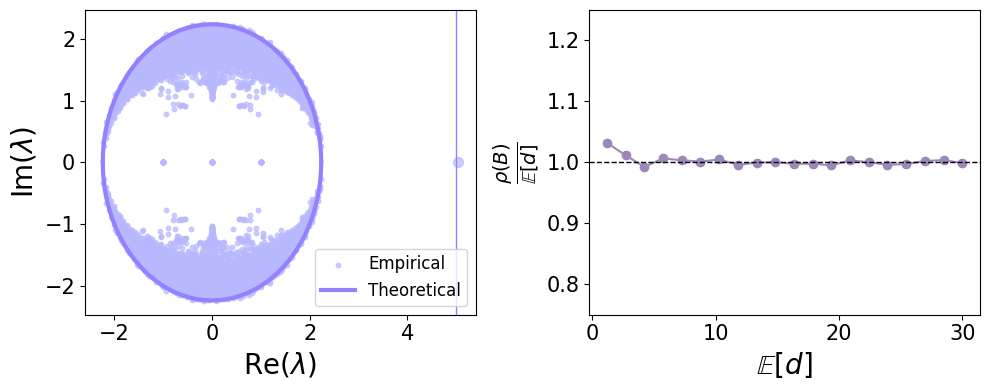

In [28]:
fig, ax = plt.subplots(1, 2, figsize =  (10,4))

s_ = s[np.abs(s) < 1.1*np.sqrt(d)]
ax[0].scatter(s_.real, s_.imag, color = '#b8b8ff', alpha = 0.7, s = 10, label = 'Empirical')

s_ = s[np.abs(s) > 1.1*np.sqrt(d)]
ax[0].scatter(s_.real, s_.imag, color = '#b8b8ff', alpha = 0.7, s = 50)

xv = np.linspace(-np.sqrt(d), np.sqrt(d), 5000)
ax[0].plot(xv, np.sqrt(np.abs(d - xv**2)), color = '#9381ff', linewidth = 3, label = 'Theoretical')
ax[0].plot(xv, -np.sqrt(np.abs(d - xv**2)), color = '#9381ff', linewidth = 3)
ax[0].axvline(d, color = '#9381ff', linewidth = 1)
ax[0].set_xlabel(r'${\rm Re}(\lambda)$', fontsize = 20)
ax[0].set_ylabel(r'${\rm Im}(\lambda)$', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize = 15)
ax[0].legend(loc = 4, fontsize = 12)


ax[1].plot(pv, np.array(ρvB)/pv, marker = 'o', markersize = 6, color = '#9c89b8')
ax[1].axhline(1, color = 'k', linewidth = 1, linestyle = '--')

ax[1].set_xlabel(r'$\mathbb{E}[d]$', fontsize = 20)
ax[1].set_ylabel(r'$\frac{\rho(B)}{\mathbb{E}[d]}$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize = 15)

ax[1].set_ylim(0.75, 1.25)
plt.tight_layout()


plt.savefig(f'{fig_directory}rho_sparseB.pdf', dpi = 400, bbox_inches = 'tight')

plt.show();